# **N-Gram - Building and Training a Feedforward Neural Network for Language Modeling**

Feedforward Neural Networks (FNNs) in language modeling. The primary objective is to build a neural network that learns word relationships and generates meaningful text sequences. The implementation is done using PyTorch, covering key aspects of Natural Language Processing (NLP), such as:
* Tokenization & Indexing: Converting text into numerical representations.
* Embedding Layers: Mapping words to dense vector representations for efficient learning.
* Context-Target Pair Generation (N-grams): Structuring training data for sequence prediction.
* Multi-Class Neural Network: Designing a model to predict the next word in a sequence.

The training process includes optimizing the model with loss functions and backpropagation techniques to improve accuracy and coherence in text generation.


# Objectives

 - Implement a feedforward neural network using the PyTorch framework, including embedding layers, for language modeling tasks.
 - Fine-tune the output layer of the neural network for optimal performance in text generation.
 - Apply various training strategies and fundamental Natural Language Processing (NLP) techniques, such as tokenization and sequence analysis, to improve text generation.


In [206]:
# !pip install nltk
# !pip install scikit-learn
# !pip install torch==2.6.0
# !pip install torchtext==0.17.2
# !pip install matplotlib
# !pip install pandas
# !pip install numpy==1.26.4

In [207]:
# !pip install torch==2.2.2 torchtext==0.17.2 nltk

### Importing required libraries


In [208]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
import random
import re
import string
from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Feedforward Neural Networks (FNNs) for language models

FNNs, or Multi-Layer Perceptrons, serve as the foundational components for comprehending neural networks in natural language processing (NLP). In NLP tasks, FNNs process textual data by transforming it into numerical vectors known as embeddings. Subsequently, these embeddings are input to the network to predict language, such as the upcoming word in a sentence or the sentiment of a text.

In [209]:
song= """We are no strangers to love
You know the rules and so do I
A full commitments what Im thinking of
You wouldnt get this from any other guy
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
And if you ask me how Im feeling
Dont tell me youre too blind to see
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you"""

 ### Tokenization for FNN


In [210]:
tokenizer = get_tokenizer("basic_english")
tokens = tokenizer(song)
print(tokens)

['we', 'are', 'no', 'strangers', 'to', 'love', 'you', 'know', 'the', 'rules', 'and', 'so', 'do', 'i', 'a', 'full', 'commitments', 'what', 'im', 'thinking', 'of', 'you', 'wouldnt', 'get', 'this', 'from', 'any', 'other', 'guy', 'i', 'just', 'wanna', 'tell', 'you', 'how', 'im', 'feeling', 'gotta', 'make', 'you', 'understand', 'never', 'gonna', 'give', 'you', 'up', 'never', 'gonna', 'let', 'you', 'down', 'never', 'gonna', 'run', 'around', 'and', 'desert', 'you', 'never', 'gonna', 'make', 'you', 'cry', 'never', 'gonna', 'say', 'goodbye', 'never', 'gonna', 'tell', 'a', 'lie', 'and', 'hurt', 'you', 'weve', 'known', 'each', 'other', 'for', 'so', 'long', 'your', 'hearts', 'been', 'aching', 'but', 'youre', 'too', 'shy', 'to', 'say', 'it', 'inside', 'we', 'both', 'know', 'whats', 'been', 'going', 'on', 'we', 'know', 'the', 'game', 'and', 'were', 'gonna', 'play', 'it', 'and', 'if', 'you', 'ask', 'me', 'how', 'im', 'feeling', 'dont', 'tell', 'me', 'youre', 'too', 'blind', 'to', 'see', 'never', 'gon

In [211]:
s = "My 1st Tweet!! 6 #NLP @someone... AWESOME :)"
s = re.sub(r"[^\w\s]", '', s)
print(s)

s = re.sub(r"\s+", '', s)
print(s)

s = re.sub(r"\d", '', s)
print(s)

My 1st Tweet 6 NLP someone AWESOME 
My1stTweet6NLPsomeoneAWESOME
MystTweetNLPsomeoneAWESOME


In [212]:
def preprocess_string(s):
    """
    Preprocesses a given string by performing the following steps:
    
    1. Removes all non-word characters (excluding letters and numbers).
    2. Removes all whitespace characters.
    3. Removes all numeric digits.

    Parameters:
    s (str): The input string to be cleaned.

    Returns:
    str: The processed string with only alphabetic characters, no spaces, and no digits.
    """

    # Remove all non-word characters (everything except letters and numbers)
    # \w matches any word character (letters, numbers, and underscores)
    # \s matches any whitespace characters
    # ^ inside [] negates the selection, so [^\w\s] matches anything that's NOT a word character or whitespace.
    s = re.sub(r"[^\w\s]", '', s)

    # Remove all whitespace characters (spaces, tabs, newlines)
    # \s+ matches one or more whitespace characters.
    s = re.sub(r"\s+", '', s)

    # Remove all digits (0-9)
    # \d matches any digit character.
    s = re.sub(r"\d", '', s)

    return s

In [213]:
preprocess_string("My 1st Tweet!! 6 #NLP @someone... AWESOME :)")

'MystTweetNLPsomeoneAWESOME'

In [214]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [215]:
def preprocess(words):
    """
    Preprocesses a given text by tokenizing it, cleaning individual words, and 
    converting them to lowercase while removing empty or punctuation tokens.

    Steps:
    1. Tokenization: Splits the input text into individual word tokens.
    2. Cleaning: Applies `preprocess_string()` to remove non-word characters, 
       spaces, and digits from each token.
    3. Normalization: Converts all tokens to lowercase.
    4. Filtering: Removes empty strings and punctuation tokens.

    Parameters:
    words (str): The input text to be tokenized and preprocessed.

    Returns:
    list: A list of cleaned, lowercase tokens.
    """

    # Tokenize the input text into words
    tokens = word_tokenize(words)

    # Apply preprocessing to each token (removes unwanted characters)
    tokens = [preprocess_string(w) for w in tokens]

    # Convert tokens to lowercase and remove empty strings or punctuation
    return [w.lower() for w in tokens if len(w) != 0 and w not in string.punctuation]

In [216]:
tokens = preprocess(song)
print(tokens)

['we', 'are', 'no', 'strangers', 'to', 'love', 'you', 'know', 'the', 'rules', 'and', 'so', 'do', 'i', 'a', 'full', 'commitments', 'what', 'im', 'thinking', 'of', 'you', 'wouldnt', 'get', 'this', 'from', 'any', 'other', 'guy', 'i', 'just', 'wan', 'na', 'tell', 'you', 'how', 'im', 'feeling', 'got', 'ta', 'make', 'you', 'understand', 'never', 'gon', 'na', 'give', 'you', 'up', 'never', 'gon', 'na', 'let', 'you', 'down', 'never', 'gon', 'na', 'run', 'around', 'and', 'desert', 'you', 'never', 'gon', 'na', 'make', 'you', 'cry', 'never', 'gon', 'na', 'say', 'goodbye', 'never', 'gon', 'na', 'tell', 'a', 'lie', 'and', 'hurt', 'you', 'weve', 'known', 'each', 'other', 'for', 'so', 'long', 'your', 'hearts', 'been', 'aching', 'but', 'youre', 'too', 'shy', 'to', 'say', 'it', 'inside', 'we', 'both', 'know', 'whats', 'been', 'going', 'on', 'we', 'know', 'the', 'game', 'and', 'were', 'gon', 'na', 'play', 'it', 'and', 'if', 'you', 'ask', 'me', 'how', 'im', 'feeling', 'dont', 'tell', 'me', 'youre', 'too',

### Indexing

Tokenize text into individual words (tokens) and build a vocabulary, which maps tokens to unique integer indexes. This is a crucial step in preparing text data for  machine learning models that require numerical input.


In [217]:
def tokenizetext(song):
    """
    Tokenizes the input text (song) and builds a vocabulary from the tokens.

    Steps:
    1. Tokenization: The function splits the input text into words and applies 
       a tokenizer function to each word.
    2. Vocabulary Building: Constructs a vocabulary from the tokenized words,
       including a special "<unk>" token to handle out-of-vocabulary words.
    3. Default Indexing: Sets the default index for unknown words, ensuring 
       that any unseen tokens are mapped to "<unk>".

    Parameters:
    song (str): The input text (song lyrics) to be tokenized and processed.

    Returns:
    vocab (Vocab): A vocabulary object mapping tokens to their corresponding indices.
    """
    
    tokenized_song = map(tokenizer, song.split())
    vocab = build_vocab_from_iterator(tokenized_song, specials=["<unk>"])
    vocab.set_default_index(vocab["<unk>"])

    return vocab

Convert the tokens to indices

In [218]:
vocab = tokenizetext(song)
vocab(tokens[0:10])

[21, 58, 70, 74, 25, 69, 2, 20, 31, 72]

In [219]:
tokens[0:10]

['we', 'are', 'no', 'strangers', 'to', 'love', 'you', 'know', 'the', 'rules']

function that converts raw text into indexes.

In [220]:
text_pipeline = lambda x: vocab(tokenizer(x))
text_pipeline(song)[0:10]

[21, 58, 70, 74, 25, 69, 2, 20, 31, 72]

word corresponding to an index using the```get_itos()```method. The result is a list where the index of the list corresponds to a word.


In [221]:
index_to_token = vocab.get_itos()
index_to_token[58]

'are'

## Embedding layers

An embedding layer is a crucial element in natural language processing (NLP) and neural networks designed for sequential data. It serves to convert categorical variables, like words or discrete indexes representing tokens, into continuous vectors. This transformation facilitates training and enables the network to learn meaningful relationships among words.

Let's consider a simple example involving a vocabulary of words 
- **Vocabulary**: {apple, banana, orange, pear}

Each word in vocabulary has a unique index assigned to it: 
- **Indices**: {0, 1, 2, 3}

When using an embedding layer, we will initialize random continuous vectors for each index. For instance, the embedding vectors might look like:

- Vector for index 0 (apple): [0.2, 0.8]
- Vector for index 1 (banana): [0.6, -0.5]
- Vector for index 2 (orange): [-0.3, 0.7]
- Vector for index 3 (pear): [0.1, 0.4]


In [222]:
def genembedding(vocab):
    """
    Generates an embedding layer for the given vocabulary.

    The embedding layer transforms words into dense vector representations, 
    allowing the model to learn semantic relationships between words.

    Parameters:
    vocab (Vocab): The vocabulary object containing unique words and their indices.

    Returns:
    nn.Embedding: A PyTorch embedding layer with a specified embedding dimension.
    """

    embedding_dim = 20  # Each word will be represented as a 20-dimensional vector
    vocab_size = len(vocab)
    embeddings = nn.Embedding(vocab_size, embedding_dim)  # Create an embedding layer

    return embeddings


**Embeddings**: Obtaining the embedding for the first word with index 0 or 1. We have to convert the input into a tensor. The embeddings are initially initialized randomly, but as the model undergoes training, words with similar meanings gradually come to cluster closer together


In [223]:
embeddings = genembedding(vocab)
for n in range(2): 
    embedding = embeddings(torch.tensor(n))
    print("word", index_to_token[n])
    print("index", n)
    print( "embedding", embedding)
    print("embedding shape", embedding.shape)
    print('-' * 100)

word <unk>
index 0
embedding tensor([ 0.4644, -3.4026, -0.4358, -0.3586,  0.8207, -2.0443,  1.3236,  1.0061,
        -0.4943, -2.0756, -2.2213,  1.3418,  0.6351,  1.7694,  0.7996, -0.8434,
         0.9004,  0.3347, -0.9212, -0.6499], grad_fn=<EmbeddingBackward0>)
embedding shape torch.Size([20])
----------------------------------------------------------------------------------------------------
word gonna
index 1
embedding tensor([ 1.1098, -0.9166, -0.1075, -2.2668,  0.2600, -1.4406,  0.1162,  1.7052,
         0.0133,  0.5825, -1.7193, -0.0170, -0.3697, -1.4972, -0.3648,  0.4766,
         1.0172, -0.5563,  0.3073, -0.8023], grad_fn=<EmbeddingBackward0>)
embedding shape torch.Size([20])
----------------------------------------------------------------------------------------------------


These vectors will serve as inputs for the next layer.


### Generating context-target pairs (n-grams)

Organizing words within a variable-size context using the following approach: Each word is denoted by 'i'. 
To establish the context, simply subtract 'j'. The size of the context is determined by the value of``CONTEXT_SIZE``.


In [265]:
# Define the context size for generating n-grams
CONTEXT_SIZE = 2  # The number of previous words used to predict the next word

def genngrams(tokens):
    """
    Generates n-grams from a list of tokens, where each n-gram consists of a 
    context (previous words) and a target (next word).

    The function constructs a list of tuples where:
    - The first element is a list of `CONTEXT_SIZE` previous words.
    - The second element is the target word that follows the context.

    Parameters:
    tokens (list): A list of preprocessed word tokens.

    Returns:
    list: A list of tuples representing n-grams.
          Each tuple contains (context_words, target_word).
    """

    # For each token at position 'i', extract the previous CONTEXT_SIZE words as context
    ngrams = [
        (
            [tokens[i - j - 1] for j in reversed(range(CONTEXT_SIZE))],  # Context words in correct order
            tokens[i]  # Target word to predict
        )
        for i in range(CONTEXT_SIZE, len(tokens))
    ]
    return ngrams

Output the first 5 element, which results in a tuple. The initial element represents the context, and the index indicates the following word.


In [225]:
for i in range(5):
    ngrams = genngrams(tokens)
    context, target = ngrams[i]
    print("context", context, "target", target)
    print("context index", vocab(context), "target index", vocab([target]))
    print('-' * 100)

context ['we', 'are'] target no
context index [21, 58] target index [70]
----------------------------------------------------------------------------------------------------
context ['are', 'no'] target strangers
context index [58, 70] target index [74]
----------------------------------------------------------------------------------------------------
context ['no', 'strangers'] target to
context index [70, 74] target index [25]
----------------------------------------------------------------------------------------------------
context ['strangers', 'to'] target love
context index [74, 25] target index [69]
----------------------------------------------------------------------------------------------------
context ['to', 'love'] target you
context index [25, 69] target index [2]
----------------------------------------------------------------------------------------------------


In this context, there are multiple words. Aggregating the embeddings of each of these words and then adjust the input size of the subsequent layer accordingly. Then, create the next layer.


In [226]:
embedding_dim = 20
linear = nn.Linear(embedding_dim*CONTEXT_SIZE, 128)


we have the two embeddings.


In [227]:
context

['to', 'love']

In [229]:
embeddings = genembedding(vocab)
my_embeddings = embeddings(torch.tensor(vocab(context)))
my_embeddings.shape

torch.Size([2, 20])

Reshape the embeddings.


In [230]:
my_embeddings = my_embeddings.reshape(1,-1)
my_embeddings.shape   

torch.Size([1, 40])


They can now be used as inputs in the next layer.


In [231]:
linear_output = linear(my_embeddings)
linear_output.shape

torch.Size([1, 128])

## Batch function

Creating a Batch function to interface with the data loader. Several adjustments are necessary to handle words that are part of a context in one batch and a predicted word in the following batch.

In [232]:
# Set the device to GPU if available; otherwise, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [233]:
# Define hyperparameters
CONTEXT_SIZE = 3   # Number of previous words used as context for prediction
BATCH_SIZE = 10    # Number of samples per training batch
EMBEDDING_DIM = 10 # Dimension of word embeddings

def collate_batch(batch):
    """
    Processes a batch of text data into input (context) and output (target) tensors
    for training a language model.

    The function extracts:
    - `context`: A list of word indices representing the context words for each target word.
    - `target`: A list of word indices representing the target word to predict.

    Parameters:
    batch (list): A list of tokenized words (strings).

    Returns:
    tuple: Two PyTorch tensors: (context_tensor, target_tensor)
           - context_tensor: Tensor of shape (batch_size - CONTEXT_SIZE, CONTEXT_SIZE),
             containing the word indices of context words.
           - target_tensor: Tensor of shape (batch_size - CONTEXT_SIZE,),
             containing the word indices of target words.
    """

    batch_size = len(batch) 
    context, target = [], []

    for i in range(CONTEXT_SIZE, batch_size):
        target.append(vocab([batch[i]]))
        context.append(vocab([batch[i - j - 1] for j in reversed(range(CONTEXT_SIZE))]))
    
#     print(torch.tensor(target).shape)
    return torch.tensor(context).to(device), torch.tensor(target).to(device).reshape(-1)


Similarly, it's important to highlight that the size of the last batch could deviate from that of the earlier batches. To tackle this, the approach involves adjusting the final batch to conform to the specified batch size, ensuring it becomes a multiple of the predetermined size. When necessary, we'll employ padding techniques to achieve this harmonization. One approach we'll use is appending the beginning of the song to the end of the batch.


In [234]:
BATCH_SIZE - len(tokens) % BATCH_SIZE

5

In [235]:
Padding = BATCH_SIZE - len(tokens) % BATCH_SIZE
tokens_pad = tokens + tokens[0:Padding]

In [236]:
len(tokens_pad) % BATCH_SIZE

0

Creating the`DataLoader`.


In [237]:
dataloader = DataLoader(
     tokens_pad, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_batch
)

## Multi-class neural network

A PyTorch class for a multi-class neural network. The network's output is the probability of the next word within a given context. Therefore, the number of classes corresponds to the count of distinct words. The initial layer consists of embeddings, and in addition to the final layer, an extra hidden layer is incorporated.

In [238]:
class NGramLanguageModeler(nn.Module):
    """
    A neural network-based n-gram language model that predicts the next word 
    given a sequence of context words.

    This model consists of:
    - An embedding layer that converts word indices into dense vector representations.
    - A fully connected hidden layer with ReLU activation.
    - An output layer that predicts the probability distribution over the vocabulary.

    Parameters:
    vocab_size (int): The number of unique words in the vocabulary.
    embedding_dim (int): The size of the word embeddings (vector representation of words).
    context_size (int): The number of previous words used as context to predict the next word.
    """

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()

        # Store context size and embedding dimension
        self.context_size = context_size
        self.embedding_dim = embedding_dim

        # Embedding layer: Maps word indices to dense vectors
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)

        # Fully connected hidden layer: Maps the concatenated embeddings to a 128-dimensional space
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)

        # Output layer: Maps the hidden layer output to vocabulary size (probability distribution over words)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        """
        Forward pass of the model.

        Parameters:
        inputs (Tensor): A tensor of shape (batch_size, context_size) containing word indices.

        Returns:
        Tensor: A tensor of shape (batch_size, vocab_size) representing predicted probabilities for the next word.
        """

        # Convert input word indices into dense vectors using the embedding layer
        embeds = self.embeddings(inputs)  # Shape: (batch_size, context_size, embedding_dim)

        # Reshape the embeddings into a single vector per input sample
        embeds = torch.reshape(embeds, (-1, self.context_size * self.embedding_dim))  
        # New shape: (batch_size, context_size * embedding_dim)

        # Apply first fully connected layer with ReLU activation
        out = F.relu(self.linear1(embeds))  # Shape: (batch_size, 128)

        # Apply second fully connected layer to generate vocabulary-size logits
        out = self.linear2(out)  # Shape: (batch_size, vocab_size)

        return out

Creating the model.


In [239]:
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)
model

NGramLanguageModeler(
  (embeddings): Embedding(79, 10)
  (linear1): Linear(in_features=30, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=79, bias=True)
)

Retrieving samples from the data loader object and input them into the neural network.


In [240]:
context, target = next(iter(dataloader))
print(context, target)
out = model(context)

tensor([[21, 58, 70],
        [58, 70, 74],
        [70, 74, 25],
        [74, 25, 69],
        [25, 69,  2],
        [69,  2, 20],
        [ 2, 20, 31]], device='cuda:0') tensor([74, 25, 69,  2, 20, 31, 72], device='cuda:0')


While the model remains untrained, analyzing the output can provide us with a clearer understanding. In the output, the first dimension corresponds to the batch size, while the second dimension represents the probability associated with each class.


In [241]:
out.shape

torch.Size([7, 79])

Find the index with the highest probability.


In [242]:
predicted_index = torch.argmax(out,1)
predicted_index

tensor([10, 10, 58, 76, 10, 35, 35], device='cuda:0')

Find the corresponding token.


In [243]:
[index_to_token[i.item()] for i in  predicted_index]

['cry', 'cry', 'are', 'this', 'cry', 'both', 'both']

Creating a function that accomplishes the same task for the tokens.


In [244]:
def write_song(model, my_song, number_of_words=100):
    """
    Generates text using a trained n-gram language model.

    Given an initial text (`my_song`), the function generates additional words by 
    predicting the next word iteratively based on the trained model.

    Parameters:
    model (nn.Module): The trained n-gram language model.
    my_song (str): The initial seed text to start generating words.
    number_of_words (int): The number of words to generate (default: 100).

    Returns:
    str: The generated song lyrics as a string.
    """

    # Get the mapping from index to word for decoding predictions
    index_to_token = vocab.get_itos()

    # Loop to generate the desired number of words
    for i in range(number_of_words):

        with torch.no_grad():  # Disable gradient computation for inference
            
            # Prepare the input context by extracting the last CONTEXT_SIZE words from tokens
            context = torch.tensor(
                vocab([tokens[i - j - 1] for j in reversed(range(CONTEXT_SIZE))])
            ).to(device)  # Move to CPU/GPU
            
            # Predict the next word by selecting the word with the highest probability
            word_idx = torch.argmax(model(context))  # Get index of the most likely next word
            
            # Append the predicted word to the generated text
            my_song += " " + index_to_token[word_idx.detach().item()]

    return my_song

In [245]:
def pickrandomline(song):
    """
    Selects a random line from the given song text.

    This function splits the song into separate lines and randomly picks one of them.

    Parameters:
    song (str): The song lyrics as a multi-line string.

    Returns:
    str: A randomly selected line from the song.
    """
    
    lines = song.split("\n")  
    selected_line = random.choice(lines).strip()
    return selected_line


selected_line = pickrandomline(song) 
generated_song = write_song(model, selected_line)
print(selected_line)
print('-' * 100)
print(generated_song)

Never gonna let you down
----------------------------------------------------------------------------------------------------
Never gonna let you down both wanna ask cry cry are this cry both both cry both cry wanna were both were both both both both give give cry were inside dont wanna cry gotta both both wanna wanna rules dont both wanna gotta rules wanna play both guy rules im both wanna both understand cry im both this inside both commitments im both rules been your let it dont im both play both guy give im both play rules cry both both rules whats both it tell both this give wanna give cry this were wanna give inside both both know it play this


## Training


In [246]:
criterion = torch.nn.CrossEntropyLoss()

We have developed a function dedicated to training the model using the supplied data loader. In addition to training the model, the function's output includes predictions for each epoch, spanning context for the next 100 words.


**Since the dataset used is relatively small and the model is trained for a limited number of epochs, the generated song may not always be fully coherent due to a restricted vocabulary. This example primarily serves to demonstrate the functionality of a feedforward neural network for language modeling.**


In [247]:
def train(dataloader, model, song, number_of_epochs=1000, show=100):
    """
    Args:
        dataloader (DataLoader): DataLoader containing training data.
        model (nn.Module): Neural network model to be trained.
        number_of_epochs (int, optional): Number of epochs for training. Default is 100.
        show (int, optional): Interval for displaying progress. Default is 10.

    Returns:
        list: List containing loss values for each epoch.
    """

    MY_LOSS = []

    for epoch in tqdm(range(number_of_epochs)):
        total_loss = 0  
        my_song = "" 

        for context, target in dataloader:
            context = context.long()
            target = target.long()
            model.zero_grad()          # Zero the gradients to avoid accumulation
            predicted = model(context)  # Forward pass through the model to get predictions
            loss = criterion(predicted, target.reshape(-1))  # Calculate the loss
            total_loss += loss.item()   # Accumulate the loss

            loss.backward()    # Backpropagation to compute gradients
            optimizer.step()   # Update model parameters using the optimizer

        # Display progress and generate song at specified intervals
        if epoch % show == 0:
            selected_line = pickrandomline(song)
            my_song += write_song(model, selected_line)    # Generate song using the model
            
            print("Selected Line:")
            print("\n")
            print(selected_line)
            
            print("Generated Song:")
            print("\n")
            print(my_song)

        MY_LOSS.append(total_loss/len(dataloader))

    return MY_LOSS

The following list will be used to store the loss for each model.


In [248]:
my_loss_list=[]

This code segment initializes an n-gram language model with a context size of 2. The model, named `model_2`, is configured based on the provided vocabulary size, embedding dimension, and context size. The Stochastic Gradient Descent (SGD) optimizer is employed with a learning rate of 0.01 to manage model parameter updates. A learning rate scheduler, using a step-wise approach with a reduction factor of 0.1 per epoch, is set up to adapt the learning rate during the training process. These settings collectively establish the framework for training the n-gram language model with tailored optimization and learning rate adjustment.

## Context of 2.

In [249]:
CONTEXT_SIZE = 2
model_2 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)
optimizer = optim.SGD(model_2.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1.0, gamma=0.1)

Now, we will train the model.


In [250]:
my_loss = train(dataloader, model_2, song)

  1%|          | 7/1000 [00:00<00:38, 25.87it/s]

Selected Line:


Never gonna say goodbye
Generated Song:


Never gonna say goodbye <unk> <unk> <unk> give down <unk> you <unk> <unk> <unk> commitments <unk> <unk> of from <unk> <unk> <unk> <unk> <unk> of <unk> <unk> <unk> <unk> <unk> of <unk> <unk> never you <unk> <unk> <unk> you <unk> <unk> <unk> <unk> <unk> <unk> <unk> never <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> you <unk> <unk> <unk> <unk> <unk> <unk> <unk> never you <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> you <unk> <unk> <unk> <unk> <unk> <unk> you <unk> thinking dont <unk> <unk> down <unk> give <unk> <unk> you <unk> <unk> <unk>


 11%|█         | 106/1000 [00:03<00:30, 29.51it/s]

Selected Line:


Never gonna give you up
Generated Song:


Never gonna give you up never are no strangers to love you know the game and we do i a full commitments never im feeling <unk> other wouldnt get this never i <unk> guy i and <unk> <unk> tell you how im feeling <unk> <unk> tell you understand never <unk> <unk> tell you up never <unk> <unk> tell you down never <unk> <unk> tell around and desert you never <unk> <unk> tell you understand never <unk> <unk> tell goodbye never <unk> <unk> tell you lie and hurt you never known each other for so long your hearts been aching but youre too shy to say


 20%|██        | 205/1000 [00:06<00:27, 29.28it/s]

Selected Line:


Never gonna run around and desert you
Generated Song:


Never gonna run around and desert you never are no strangers to love you know the game and we do i a full commitments what im thinking <unk> other wouldnt get this from any other guy i and <unk> <unk> tell you how im feeling <unk> <unk> tell you understand never <unk> <unk> tell you up never <unk> <unk> tell you down never <unk> <unk> tell around and desert you never <unk> <unk> tell you understand never <unk> <unk> tell goodbye never <unk> <unk> tell you lie and hurt you never known each other for so long your hearts been aching but youre too shy to say


 31%|███       | 306/1000 [00:10<00:24, 28.81it/s]

Selected Line:


And if you ask me how Im feeling
Generated Song:


And if you ask me how Im feeling never are no strangers to love you know the game and we do i a full commitments what im thinking <unk> other wouldnt get this from any other guy i and <unk> <unk> tell you how im feeling dont <unk> tell you understand never <unk> <unk> tell you up never <unk> <unk> tell you down never <unk> <unk> tell around and desert you never <unk> <unk> tell you understand never <unk> <unk> tell goodbye never <unk> <unk> tell you lie and hurt you never known each other for so long your hearts been aching but youre too shy to say


 41%|████      | 407/1000 [00:13<00:20, 29.63it/s]

Selected Line:


Never gonna let you down
Generated Song:


Never gonna let you down never are no strangers to love you know the game and we do i a full commitments what im thinking <unk> other wouldnt get this from any other guy i and <unk> <unk> tell you how im feeling dont <unk> tell you understand never <unk> <unk> tell you up never <unk> <unk> tell you down never <unk> <unk> tell around and desert you never <unk> <unk> tell you understand never <unk> <unk> tell goodbye never <unk> <unk> tell you lie and hurt you never known each other for so long your hearts been aching but youre too shy to say


 50%|█████     | 504/1000 [00:16<00:17, 27.72it/s]

Selected Line:


I just wanna tell you how Im feeling
Generated Song:


I just wanna tell you how Im feeling never are no strangers to love you know the game and from do i a full commitments what im thinking <unk> other wouldnt get this from any other guy i and <unk> <unk> tell you how im feeling dont <unk> tell you understand never <unk> <unk> tell you up never <unk> <unk> tell you down never <unk> <unk> tell around and desert you never <unk> <unk> tell you understand never <unk> <unk> tell goodbye never <unk> <unk> tell you lie and hurt you never known each other for so long your hearts been aching but youre too shy to say


 61%|██████    | 606/1000 [00:20<00:14, 27.62it/s]

Selected Line:


You know the rules and so do I
Generated Song:


You know the rules and so do I never are no strangers to love you know the game and from do i a full commitments what im thinking <unk> other wouldnt get this from any other guy i and <unk> <unk> tell you how im feeling dont <unk> tell you understand never <unk> <unk> tell you up never <unk> <unk> tell you down never <unk> <unk> tell around and desert you never <unk> <unk> tell you understand never <unk> <unk> tell goodbye never <unk> <unk> tell you lie and hurt you never known each other for so long your hearts been aching but youre too shy to say


 70%|███████   | 704/1000 [00:23<00:10, 28.43it/s]

Selected Line:


Never gonna make you cry
Generated Song:


Never gonna make you cry never are no strangers to love you know the game and from do i a full commitments what im thinking <unk> other wouldnt get this from any other guy i and <unk> <unk> tell you how im feeling dont <unk> tell you understand never <unk> <unk> tell you up never <unk> <unk> tell you down never <unk> <unk> tell around and desert you never <unk> <unk> tell you understand never <unk> <unk> tell goodbye never <unk> <unk> tell you lie and hurt you never known each other for so long your hearts been aching but youre too shy to say


 81%|████████  | 807/1000 [00:27<00:06, 28.84it/s]

Selected Line:


Never gonna say goodbye
Generated Song:


Never gonna say goodbye never are no strangers to love you know the game and from do i a full commitments what im thinking <unk> other wouldnt get this from any other guy i and <unk> <unk> tell you how im feeling dont <unk> tell you understand never <unk> <unk> tell you up never <unk> <unk> tell you down never <unk> <unk> tell around and desert you never <unk> <unk> tell you understand never <unk> <unk> tell goodbye never <unk> <unk> tell you lie and hurt you never known each other for so long your hearts been aching but youre too shy to say


 91%|█████████ | 907/1000 [00:30<00:03, 29.53it/s]

Selected Line:


Your hearts been aching but youre too shy to say it
Generated Song:


Your hearts been aching but youre too shy to say it never are no strangers to love you know the game and from do i a full commitments what im thinking <unk> other wouldnt get this from any other guy i and <unk> <unk> tell you how im feeling dont <unk> tell you understand never <unk> <unk> tell you up never <unk> <unk> tell you down never <unk> <unk> tell around and desert you never <unk> <unk> tell you understand never <unk> <unk> tell goodbye never <unk> <unk> tell you lie and hurt you never known each other for so long your hearts been aching but youre too shy to say


100%|██████████| 1000/1000 [00:33<00:00, 29.53it/s]


Saving the model.


In [251]:
save_path = '2gram.pth'
torch.save(model_2.state_dict(), save_path)
my_loss_list.append(my_loss)

The code provided below shows word embeddings from the created model, reducing their dimensionality to 2D using t-SNE, and then plotting them as a scatter plot. Additionally, it annotates the first 20 points in the visualization with their corresponding words. This is used to visualize how similar words cluster together in a lower-dimensional space, revealing the structure of the word embeddings. Embeddings allow the model to represent words in a continuous vector space, capturing semantic relationships and similarities between words.


In [252]:
X = model_2.embeddings.weight.cpu().detach().numpy()
X.shape

(79, 10)

In [253]:
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)
X_2d.shape

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x757177d8e940>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


(79, 2)

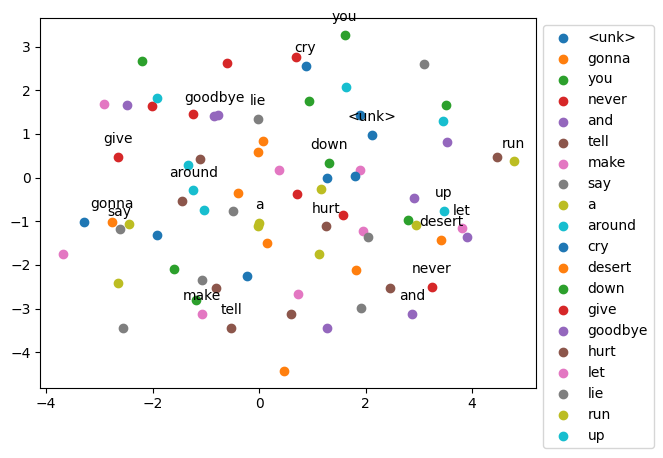

In [254]:
labels = []

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_token[j])
        labels.append(index_to_token[j])
        # Add words as annotations
        plt.annotate(index_to_token[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1])

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Context of 4

Repeating the process for a context of four.


In [255]:
CONTEXT_SIZE=4
model_4 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)
optimizer = optim.SGD(model_4.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
my_loss = train(dataloader, model_4, song)

save_path = '4gram.pth'
torch.save(model_4.state_dict(), save_path)

my_loss_list.append(my_loss)

  1%|          | 6/1000 [00:00<00:39, 25.30it/s]

Selected Line:


A full commitments what Im thinking of
Generated Song:


A full commitments what Im thinking of <unk> <unk> <unk> <unk> <unk> you <unk> <unk> <unk> <unk> <unk> <unk> never <unk> you you your <unk> whats other <unk> <unk> <unk> <unk> <unk> you <unk> <unk> <unk> <unk> never <unk> <unk> <unk> you <unk> <unk> never <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> you you me you <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> you <unk> <unk> <unk> <unk> you <unk> other you <unk> <unk> <unk> <unk> you never <unk> other <unk> <unk> love you <unk> you other from <unk>


 10%|█         | 104/1000 [00:03<00:31, 28.12it/s]

Selected Line:


You know the rules and so do I
Generated Song:


You know the rules and so do I never are no strangers to love you know the rules <unk> were <unk> never a full commitments what im thinking been im <unk> <unk> this from any other guy i been been say tell you how im feeling <unk> <unk> tell you understand never <unk> <unk> give you up never <unk> <unk> let you down never <unk> <unk> run around never never you never <unk> <unk> make you understand never <unk> <unk> say goodbye never <unk> <unk> tell you lie never to you never known each other for so long youre <unk> been aching but youre too shy to say


 20%|██        | 204/1000 [00:06<00:26, 29.49it/s]

Selected Line:


I just wanna tell you how Im feeling
Generated Song:


I just wanna tell you how Im feeling never are no strangers to love you know the rules <unk> were <unk> never a full commitments what im thinking been im <unk> <unk> this from any other guy i been been say tell you how im feeling <unk> <unk> tell you understand never <unk> <unk> give you up never <unk> <unk> let you down never <unk> <unk> run around never never you never <unk> <unk> make you understand never <unk> <unk> say goodbye never <unk> <unk> tell a lie and to you never known each other for so long youre <unk> been aching but youre too shy to say


 30%|███       | 305/1000 [00:10<00:25, 27.50it/s]

Selected Line:


Never gonna run around and desert you
Generated Song:


Never gonna run around and desert you never are no strangers to love you know the rules <unk> were <unk> never a full commitments what im thinking been im <unk> <unk> this from any other guy i been been say tell you how im feeling <unk> <unk> tell you understand never <unk> <unk> give you up never <unk> <unk> let you down never <unk> <unk> run around never never you never <unk> <unk> make you understand never <unk> <unk> say goodbye never <unk> <unk> tell a lie and what you never known each other for so long youre <unk> been aching but youre too shy to say


 41%|████      | 406/1000 [00:13<00:20, 29.18it/s]

Selected Line:


Weve known each other for so long
Generated Song:


Weve known each other for so long never are no strangers to love you know the rules <unk> were <unk> never a full commitments what im thinking been im <unk> <unk> this from any other guy i been been say tell you how im feeling <unk> <unk> tell you understand never <unk> <unk> give you up never <unk> <unk> let you down never <unk> <unk> run around never never you never <unk> <unk> make you understand never <unk> <unk> say goodbye never <unk> <unk> tell a lie and what you never known each other for so long youre <unk> been aching but youre too shy to say


 51%|█████     | 506/1000 [00:16<00:15, 31.27it/s]

Selected Line:


Never gonna make you cry
Generated Song:


Never gonna make you cry never are no strangers to love you know the rules <unk> were <unk> never a full commitments what im thinking been im <unk> <unk> this from any other guy i been been say tell you how im feeling <unk> <unk> tell you understand never <unk> <unk> give you up never <unk> <unk> let you down never <unk> <unk> run around never never you never <unk> <unk> make you understand never <unk> <unk> say goodbye never <unk> <unk> tell a lie and what you never known each other for so long youre <unk> been aching but youre too shy to say


 61%|██████    | 606/1000 [00:19<00:12, 31.23it/s]

Selected Line:


Dont tell me youre too blind to see
Generated Song:


Dont tell me youre too blind to see never are no strangers to love you know the rules and were <unk> never a full commitments what im thinking been im <unk> <unk> this from any other guy i been been say tell you how im feeling <unk> <unk> tell you understand never <unk> <unk> give you up never <unk> <unk> let you down never <unk> <unk> run around never never you never <unk> <unk> make you understand never <unk> <unk> say goodbye never <unk> <unk> tell a lie and what you never known each other for so long youre <unk> been aching but youre too shy to say


 71%|███████   | 706/1000 [00:23<00:09, 31.19it/s]

Selected Line:


Inside we both know whats been going on
Generated Song:


Inside we both know whats been going on never are no strangers to love you know the rules and were <unk> never a full commitments what im thinking been im <unk> <unk> this from any other guy i been been say tell you how im feeling <unk> <unk> tell you understand never <unk> <unk> give you up never <unk> <unk> let you down never <unk> <unk> run around never never you never <unk> <unk> make you understand never <unk> <unk> say goodbye never <unk> <unk> tell a lie and what you never known each other for so long youre <unk> been aching but youre too shy to say


 81%|████████  | 806/1000 [00:26<00:06, 31.28it/s]

Selected Line:


Never gonna make you cry
Generated Song:


Never gonna make you cry never are no strangers to love you know the rules and were <unk> never a full commitments what im thinking been im <unk> <unk> this from any other guy i been been say tell you how im feeling <unk> <unk> tell you understand never <unk> <unk> give you up never <unk> <unk> let you down never <unk> <unk> run around never never you never <unk> <unk> make you understand never <unk> <unk> say goodbye never <unk> <unk> tell a lie and what you never known each other for so long youre <unk> been aching but youre too shy to say


 91%|█████████ | 906/1000 [00:29<00:03, 31.10it/s]

Selected Line:


Never gonna let you down
Generated Song:


Never gonna let you down never are no strangers to love you know the rules and were <unk> never a full commitments what im thinking been im <unk> <unk> this from any other guy i been been say tell you how im feeling <unk> <unk> tell you understand never <unk> <unk> give you up never <unk> <unk> let you down never <unk> <unk> run around never never you never <unk> <unk> make you understand never <unk> <unk> say goodbye never <unk> <unk> tell a lie and what you never known each other for so long youre <unk> been aching but youre too shy to say


100%|██████████| 1000/1000 [00:32<00:00, 30.96it/s]


The code shows word embeddings from the created model, reduces their dimensionality to 2d using t-SNE, and then plots them as a scatter plot. Additionally, it annotates the first 20 points in the visualization with their corresponding words. This is used to visualize how similar words cluster together in a lower-dimensional space, revealing the structure of the word embeddings. Embeddings allow the model to represent words in a continuous vector space, capturing semantic relationships and similarities between words.


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7570c5342790>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


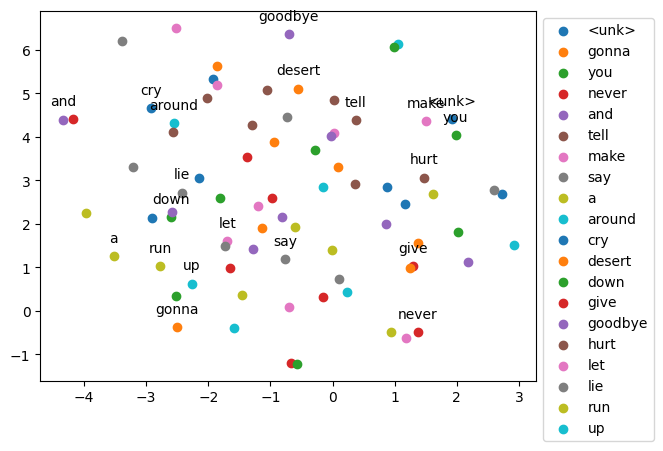

In [256]:
X = model_4.embeddings.weight.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

labels = []

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_token[j])
        labels.append(index_to_token[j])
        # Add words as annotations
        plt.annotate(index_to_token[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1])

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Context of 8


In [257]:
CONTEXT_SIZE=8
model_8 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)
optimizer = optim.SGD(model_8.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

my_loss = train(dataloader,model_8,song)

save_path = '8gram.pth'
torch.save(model_8.state_dict(), save_path)

my_loss_list.append(my_loss)

  1%|          | 7/1000 [00:00<00:34, 28.48it/s]

Selected Line:


Never gonna let you down
Generated Song:


Never gonna let you down <unk> <unk> <unk> <unk> <unk> <unk> <unk> make give <unk> <unk> feeling <unk> <unk> up <unk> your <unk> <unk> <unk> <unk> <unk> <unk> <unk> you <unk> <unk> <unk> <unk> i down for <unk> <unk> you make <unk> <unk> <unk> <unk> <unk> you <unk> <unk> <unk> <unk> <unk> you <unk> give <unk> <unk> <unk> you <unk> never <unk> <unk> <unk> you <unk> <unk> <unk> <unk> <unk> <unk> tell you <unk> <unk> <unk> <unk> <unk> you <unk> <unk> <unk> tell you <unk> <unk> <unk> <unk> <unk> <unk> <unk> give <unk> <unk> <unk> <unk> <unk> gotta <unk> <unk> <unk> <unk> <unk> <unk> <unk>


 11%|█         | 107/1000 [00:03<00:28, 31.41it/s]

Selected Line:


Never gonna give you up
Generated Song:


Never gonna give you up <unk> around feeling strangers to so tell to the rules shy to <unk> long me give to <unk> im thinking to <unk> too make to too to <unk> guy i on strangers guy tell you lie im feeling <unk> <unk> give you cry never <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> run around up never <unk> tell a <unk> make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> <unk> <unk> around tell other for so long me say me going im we too shy to say


 21%|██        | 207/1000 [00:06<00:25, 31.09it/s]

Selected Line:


Never gonna give you up
Generated Song:


Never gonna give you up <unk> around feeling strangers to so tell to the rules shy to <unk> long me give to im im thinking to <unk> too make to too to <unk> guy i on strangers guy tell you lie im feeling <unk> <unk> give you cry never <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> run around up never <unk> tell a <unk> make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> <unk> <unk> around tell other for so long me say me going im we too shy to say


 31%|███       | 307/1000 [00:09<00:21, 31.90it/s]

Selected Line:


Never gonna say goodbye
Generated Song:


Never gonna say goodbye <unk> around feeling strangers to so tell to the rules shy to <unk> long me give to im im thinking to <unk> too make to too to <unk> guy i on strangers guy tell you lie im feeling <unk> <unk> give you cry never <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> run around up never <unk> tell a <unk> make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> <unk> <unk> around tell other for so long me say me going im we too shy to say


 41%|████      | 407/1000 [00:12<00:18, 31.44it/s]

Selected Line:


Never gonna say goodbye
Generated Song:


Never gonna say goodbye <unk> around feeling strangers to so tell to the rules shy to <unk> long me give to im im thinking to <unk> too make to too to <unk> guy i on strangers guy tell you lie im feeling <unk> <unk> give you cry never <unk> <unk> give you up never <unk> <unk> run you up never <unk> <unk> run around up never <unk> tell a <unk> make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> <unk> <unk> around tell other for so long me say me going im we too shy to say


 51%|█████     | 507/1000 [00:15<00:15, 31.81it/s]

Selected Line:


Never gonna say goodbye
Generated Song:


Never gonna say goodbye <unk> around feeling strangers to so tell to the rules shy to <unk> long me give to im im thinking to <unk> too make to too to <unk> guy i on strangers guy give you lie im feeling <unk> <unk> give you cry never <unk> <unk> give you up never <unk> <unk> run you up never <unk> <unk> run around up never <unk> tell a <unk> make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> <unk> <unk> around tell other for so long me say me going im we too shy to say


 61%|██████    | 607/1000 [00:18<00:13, 29.99it/s]

Selected Line:


Never gonna give you up
Generated Song:


Never gonna give you up <unk> around feeling strangers to so tell to the rules shy to <unk> long me give to im im thinking to <unk> too make to too to <unk> guy i on strangers guy give you lie im feeling <unk> <unk> give you lie never <unk> <unk> give you up never <unk> <unk> run you up never <unk> <unk> run around up never <unk> tell a <unk> make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> <unk> <unk> around tell other for so long me say me going im we too shy to say


 71%|███████   | 707/1000 [00:22<00:09, 30.01it/s]

Selected Line:


Never gonna give you up
Generated Song:


Never gonna give you up <unk> around feeling strangers to so tell to the rules shy to <unk> long me give to im im thinking to <unk> too make to too to <unk> guy i on strangers guy give you lie im feeling <unk> <unk> give you lie never <unk> <unk> give you up never <unk> <unk> run you up never <unk> <unk> run around up never <unk> tell a <unk> make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> <unk> <unk> around tell other for so long me say me going im we too shy to say


 81%|████████  | 807/1000 [00:25<00:06, 29.90it/s]

Selected Line:


Never gonna give you up
Generated Song:


Never gonna give you up <unk> around feeling strangers to so tell to the rules shy to <unk> long me give to im im thinking to <unk> too make to too to <unk> guy i on strangers guy give you lie im feeling <unk> <unk> give you lie never <unk> <unk> give you up never <unk> <unk> run you up never <unk> <unk> run around up never <unk> tell a <unk> make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> <unk> <unk> around tell other for so long me say me going im we too shy to say


 91%|█████████ | 907/1000 [00:28<00:03, 29.80it/s]

Selected Line:


Never gonna tell a lie and hurt you
Generated Song:


Never gonna tell a lie and hurt you <unk> around feeling strangers to so tell to the rules shy to <unk> long me give to im im thinking to <unk> too make to too to <unk> guy i on strangers guy give you lie im feeling <unk> <unk> give you lie never <unk> <unk> give you up never <unk> <unk> run you up never <unk> <unk> run around up never <unk> tell a <unk> make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> <unk> <unk> around tell other for so long me say me going im we too shy to say


100%|██████████| 1000/1000 [00:31<00:00, 31.53it/s]


The code shows word embeddings from the created model, reduces their dimensionality to 2D using t-SNE, and then plots them as a scatter plot. Additionally, it annotates the first 20 points in the visualization with their corresponding words. This is used to visualize how similar words cluster together in a lower-dimensional space, revealing the structure of the word embeddings. Embeddings allow the model to represent words in a continuous vector space, capturing semantic relationships and similarities between words.


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7570c549b940>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


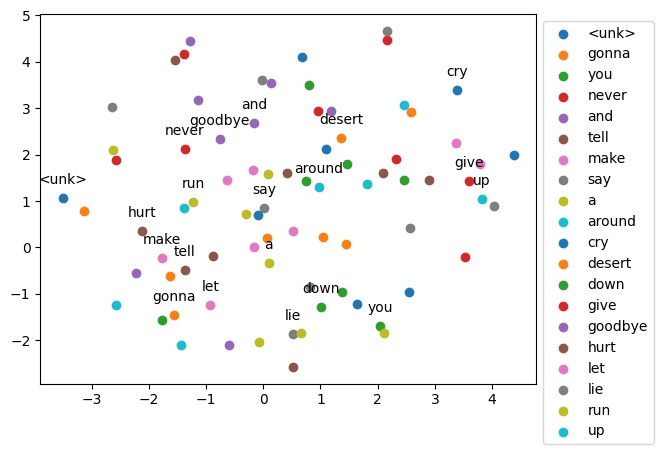

In [258]:
X = model_8.embeddings.weight.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

labels = []

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_token[j])
        labels.append(index_to_token[j])
        # Add words as annotations
        plt.annotate(index_to_token[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1])

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

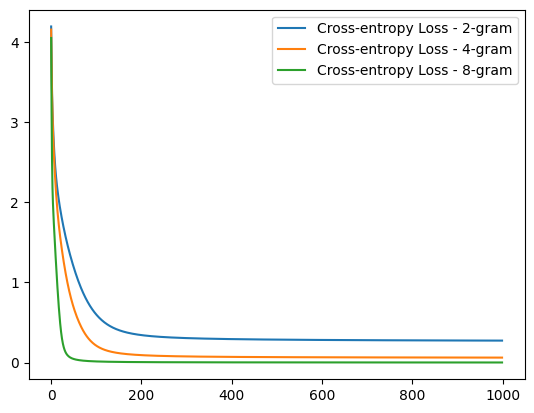

In [259]:
for my_loss, model_name in zip(my_loss_list, ["2-gram", "4-gram", "8-gram"]):
    plt.plot(my_loss, label=f"Cross-entropy Loss - {model_name}")

plt.legend()
plt.show()

## Perplexity
Perplexity is a measurement used to evaluate the effectiveness of language models or probability models. It provides an indication of how well a model predicts a sample of data or the likelihood of an unseen event. Perplexity is commonly used in natural language processing tasks, such as machine translation, speech recognition, and language generation.

Perplexity is derived from the concept of cross-entropy loss, which measures the dissimilarity between predicted probabilities and actual probabilities. 

$$\text{Cross-Entropy Loss} = -\sum_{i=1}^{N} y_i \ln(p_i)$$
The cross-entropy loss is calculated by taking the negative sum of the products of the true labels $y_i$ and the logarithm of the predicted probabilities $p_i$ over $N$ classes.

Taking the exponential of the mean cross-entropy loss gives us the perplexity value.

$$\text{Perplexity} = e^{\frac{1}{N} \text{Cross-Entropy Loss}}$$


A lower perplexity value indicates that the model is more confident and accurate in predicting the data. Conversely, a higher perplexity suggests that the model is less certain and less accurate in its predictions.

Perplexity can be seen as an estimate of the average number of choices the model has for the next word or event in a sequence. A lower perplexity means that the model is more certain about the next word, while a higher perplexity means that there are more possible choices.


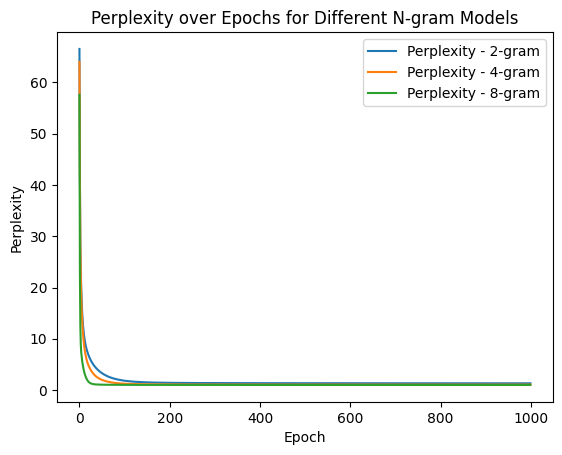

In [260]:
for my_loss, model_name in zip(my_loss_list, ["2-gram", "4-gram", "8-gram"]):
    # Calculate perplexity for each epoch
    perplexity = np.exp(np.array(my_loss))
    plt.plot(perplexity, label=f"Perplexity - {model_name}")

plt.xlabel("Epoch")
plt.ylabel("Perplexity")
plt.title("Perplexity over Epochs for Different N-gram Models")
plt.legend()
plt.show()

# nursery rhymes

In [262]:
nursery_rhymes = """
Little Miss Muffet
Sat on a tuffet,
Eating her curds and whey;
Along came a spider
Who sat down beside her
And frightened Miss Muffet away.

Twinkle, twinkle, little star,
How I wonder what you are!
Up above the world so high,
Like a diamond in the sky.

Baa, baa, black sheep,
Have you any wool?
Yes sir, yes sir,
Three bags full.

Jack and Jill went up the hill
To fetch a pail of water.
Jack fell down and broke his crown,
And Jill came tumbling after.

Hickory dickory dock,
The mouse ran up the clock.
The clock struck one,
The mouse ran down,
Hickory dickory dock.

Humpty Dumpty sat on a wall,
Humpty Dumpty had a great fall.
All the king's horses and all the king's men
Couldn't put Humpty together again.

Mary had a little lamb,
Its fleece was white as snow;
And everywhere that Mary went,
The lamb was sure to go.

Old MacDonald had a farm,
E-I-E-I-O,
And on his farm he had a cow,
E-I-E-I-O.

Itsy Bitsy Spider climbed up the waterspout.
Down came the rain and washed the spider out.
Out came the sun and dried up all the rain,
And the Itsy Bitsy Spider climbed up the spout again.

The wheels on the bus go round and round,
Round and round,
Round and round.
The wheels on the bus go round and round,
All through the town.

"""

In [266]:
# context size
CONTEXT_SIZE = 2  
# Preprocess the text to tokenize and clean it
tokens = preprocess(nursery_rhymes)
# Generate N-grams using the `genngrams` function
ngrams = genngrams(tokens)  


for i in range(5):
    context, target = ngrams[i]
    print("context", context, "target", target)
    print("context index", vocab(context), "target index", vocab([target]))
    print('-' * 100)

context ['little', 'miss'] target muffet
context index [17, 39] target index [41]
----------------------------------------------------------------------------------------------------
context ['miss', 'muffet'] target sat
context index [39, 41] target index [18]
----------------------------------------------------------------------------------------------------
context ['muffet', 'sat'] target on
context index [41, 18] target index [8]
----------------------------------------------------------------------------------------------------
context ['sat', 'on'] target a
context index [18, 8] target index [5]
----------------------------------------------------------------------------------------------------
context ['on', 'a'] target tuffet
context index [8, 5] target index [114]
----------------------------------------------------------------------------------------------------


In [267]:
# Tokenize text and create vocabulary
vocab = tokenizetext(nursery_rhymes)  
# Define embedding dimensions and create layers
embedding_dim = 20 
linear = nn.Linear(embedding_dim * CONTEXT_SIZE, 128)  
# Generate embeddings using the custom embedding function
embeddings = genembedding(vocab)  
# Convert context words into embeddings
my_embeddings = embeddings(torch.tensor(vocab(context)))  
# Reshape embeddings to match the input shape required by the linear layer
my_embeddings = my_embeddings.reshape(1, -1)  
# Pass embeddings through the linear layer
output = linear(my_embeddings)  
# Print output shape for verification
print("Output shape:", output.shape) 

Output shape: torch.Size([1, 128])


In [268]:
# Define constants for training
CONTEXT_SIZE = 3  # The number of words in the context window
BATCH_SIZE = 10   # The number of samples per batch
EMBEDDING_DIM = 10  # The dimension of the word embeddings

# Compute padding to ensure the number of tokens is evenly divisible by the batch size
Padding = BATCH_SIZE - len(tokens) % BATCH_SIZE  
tokens_pad = tokens + tokens[0:Padding]  


# Define device (CPU/GPU) for computation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  

# Create DataLoader for batch processing
dataloader = DataLoader(
    tokens_pad, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_batch
)  
# Print length of total tokens after padding
print(f"Total tokens (before padding): {len(tokens)}")
print(f"Total tokens (after padding): {len(tokens_pad)}")

Total tokens (before padding): 238
Total tokens (after padding): 240


In [269]:
# Define the loss function
criterion = torch.nn.CrossEntropyLoss()  
# Initialize the N-gram language model
model3 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)  
# Define the optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model3.parameters(), lr=0.01)  
# Implement Learning Rate Scheduling
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)  



print(f"Training started with {len(vocab)} words in vocabulary.")
print(f"Optimizer: {optimizer}")
print(f"Learning rate scheduler: {scheduler}")

# Train the model and track loss history
loss_history = train(dataloader, model3, nursery_rhymes)  

  0%|          | 4/1000 [00:00<00:26, 38.14it/s]

Training started with 127 words in vocabulary.
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    initial_lr: 0.01
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Learning rate scheduler: <torch.optim.lr_scheduler.StepLR object at 0x75726a4a9ac0>
Selected Line:



Generated Song:


 wheels miss the all sun fleece round miss miss miss twinkle bitsy miss miss miss round miss miss spider fleece fleece dumpty little miss miss spider miss the wonder miss the pail snow tumbling fleece sat miss miss men sat spider miss miss fell miss snow miss miss spider you miss miss pail sir fell miss out spider twinkle fleece miss miss spider men lamb miss miss miss miss spider <unk> sat spider miss you its all spider miss sir round miss miss jill came spider miss miss miss waterspout miss came e-i-e-i-o spider spider sure pail sat miss lamb


 11%|█         | 109/1000 [00:02<00:19, 46.76it/s]

Selected Line:


Baa, baa, black sheep,
Generated Song:


Baa, baa, black sheep, little miss and sat on a wall eating her curds the round up came a spider who sat down beside came a all miss muffet away twinkle twinkle up up the was the what you are up above the world and the and a diamond in the bus baa baa humpty farm and you any wool yes sir yes sir humpty sir and jack miss jill came up the hill on go <unk> pail of water jack fell down and came up farm and jill came tumbling after hickory dickory dock humpty the ran down the clock the clock the


 21%|██        | 209/1000 [00:04<00:16, 46.69it/s]

Selected Line:


And frightened Miss Muffet away.
Generated Song:


And frightened Miss Muffet away. little miss and sat on a wall eating her curds the washed up came a spider who sat down beside came away all miss muffet away twinkle twinkle little star the was the what you are up above the world on the and a diamond in the sky baa baa humpty farm and you any wool yes sir yes sir humpty sir and jack and jill went up the hill on on old pail of water jack fell down and came up farm and jill came tumbling after hickory dickory dock humpty the ran down the clock the clock struck


 31%|███       | 309/1000 [00:06<00:14, 46.76it/s]

Selected Line:


The lamb was sure to go.
Generated Song:


The lamb was sure to go. little miss and sat on a wall eating her curds the washed up came a spider who sat down beside came away all miss muffet away twinkle twinkle little star the was the what you are up above the world on the and a diamond in the sky baa baa humpty farm and you any wool yes sir yes sir humpty sir and jack and jill went up the hill on on old pail of water jack fell down and came up farm and jill came tumbling after hickory dickory dock humpty the ran down the clock the clock struck


 41%|████      | 409/1000 [00:08<00:12, 46.64it/s]

Selected Line:



Generated Song:


 little miss and sat on a wall eating her curds the washed up came a spider who sat down beside came away all miss muffet away twinkle twinkle little star the was the what you are up above the world on the and a diamond in the sky baa baa humpty farm and you any wool yes sir yes sir humpty sir and jack and jill went up the hill on on old pail of water jack fell down and came up farm and jill came tumbling after hickory dickory dock humpty sky ran down the clock the clock struck


 51%|█████     | 509/1000 [00:10<00:10, 46.79it/s]

Selected Line:


Twinkle, twinkle, little star,
Generated Song:


Twinkle, twinkle, little star, little miss and sat on a wall eating her curds the washed up came a spider who sat down beside came away all miss muffet away twinkle twinkle little star the was the what you are up above the world on the and a diamond in the sky baa baa humpty farm and you any wool yes sir yes sir humpty sir and jack and jill went up the hill on on old pail of water jack fell down and came up farm and jill came tumbling after hickory dickory dock humpty sky ran down the clock the clock struck


 61%|██████    | 609/1000 [00:12<00:08, 46.74it/s]

Selected Line:


And Jill came tumbling after.
Generated Song:


And Jill came tumbling after. little miss and sat on a wall eating her curds the washed up came a spider who sat down beside came away all miss muffet away twinkle twinkle little star the was the what you are up above the world on the and a diamond in the sky baa baa humpty farm and you any wool yes sir yes sir humpty sir and jack and jill went up the hill on on old pail of water jack fell down and came up farm and jill came tumbling after hickory dickory dock humpty sky ran down the clock the clock struck


 71%|███████   | 709/1000 [00:14<00:06, 46.49it/s]

Selected Line:


Eating her curds and whey;
Generated Song:


Eating her curds and whey; little miss and sat on a wall eating her curds the washed up came a spider who sat down beside came away all miss muffet away twinkle twinkle little star the was the what you are up above the world on the and a diamond in the sky baa baa humpty farm and you any wool yes sir yes sir humpty sir and jack and jill went up the hill on on old pail of water jack fell down and came up farm and jill came tumbling after hickory dickory dock humpty sky ran down the clock the clock struck


 81%|████████  | 809/1000 [00:16<00:04, 46.71it/s]

Selected Line:


All through the town.
Generated Song:


All through the town. little miss and sat on a wall eating her curds the washed up came a spider who sat down beside came away all miss muffet away twinkle twinkle little star the was the what you are up above the world on the and a diamond in the sky baa baa humpty farm and you any wool yes sir yes sir humpty sir and jack and jill went up the hill on on old pail of water jack fell down and came up farm and jill came tumbling after hickory dickory dock humpty sky ran down the clock the clock struck


 91%|█████████ | 909/1000 [00:18<00:01, 46.71it/s]

Selected Line:


The mouse ran down,
Generated Song:


The mouse ran down, little miss and sat on a wall eating her curds the washed up came a spider who sat down beside came away all miss muffet away twinkle twinkle little star the was the what you are up above the world on the and a diamond in the sky baa baa humpty farm and you any wool yes sir yes sir humpty sir and jack and jill went up the hill on on old pail of water jack fell down and came up farm and jill came tumbling after hickory dickory dock humpty sky ran down the clock the clock struck


100%|██████████| 1000/1000 [00:20<00:00, 48.02it/s]


In [270]:
# Select a random line from the nursery rhymes dataset
selected_line = pickrandomline(nursery_rhymes)  
# Generate a new rhyme using the trained language model
generated_rhyme = write_song(model3, selected_line)  
# Print the generated rhyme
print(generated_rhyme) 

 little miss and sat on a wall eating her curds the washed up came a spider who sat down beside came away all miss muffet away twinkle twinkle little star the was the what you are up above the world on the and a diamond in the sky baa baa humpty farm and you any wool yes sir yes sir humpty sir and jack and jill went up the hill on on old pail of water jack fell down and came up farm and jill came tumbling after hickory dickory dock humpty sky ran down the clock the clock struck


In [272]:
print(nursery_rhymes)


Little Miss Muffet
Sat on a tuffet,
Eating her curds and whey;
Along came a spider
Who sat down beside her
And frightened Miss Muffet away.

Twinkle, twinkle, little star,
How I wonder what you are!
Up above the world so high,
Like a diamond in the sky.

Baa, baa, black sheep,
Have you any wool?
Yes sir, yes sir,
Three bags full.

Jack and Jill went up the hill
To fetch a pail of water.
Jack fell down and broke his crown,
And Jill came tumbling after.

Hickory dickory dock,
The mouse ran up the clock.
The clock struck one,
The mouse ran down,
Hickory dickory dock.

Humpty Dumpty sat on a wall,
Humpty Dumpty had a great fall.
All the king's horses and all the king's men
Couldn't put Humpty together again.

Mary had a little lamb,
Its fleece was white as snow;
And everywhere that Mary went,
The lamb was sure to go.

Old MacDonald had a farm,
E-I-E-I-O,
And on his farm he had a cow,
E-I-E-I-O.

Itsy Bitsy Spider climbed up the waterspout.
Down came the rain and washed the spider out.
Out